# GUI Automaton
From Chapter 20 of 'Automate The Boring Stuff With Python' by Al Sweigart

In [11]:
#pip install pyautogui

In [2]:
import pyautogui
import time
import pyinputplus as pyip

### CONTROLLING THE KEYBOARD AND MOUSE WITH GUI AUTOMATION

## Manage Error
#### Pauses and Fail-Safes

If your program has a bug and you’re unable to use the keyboard and mouse to shut it down, you can use PyAutoGUI’s fail-safe feature. Quickly slide the mouse to one of the four corners of the screen. Every PyAutoGUI function call has a 10th-of-a-second delay after performing its action to give you enough time to move the mouse to a corner. If PyAutoGUI then finds that the mouse cursor is in a corner, it raises the pyautogui.FailSafeException exception. Non-PyAutoGUI instructions will not have this 10th-of-a-second delay.
If you find yourself in a situation where you need to stop your PyAutoGUI program, just slam the mouse toward a corner to stop it.

#### Shutting Down Everything by Logging Out
Perhaps the simplest way to stop an out-of-control GUI automation program is to log out, which will shut down all running programs. On Windows and Linux, the logout hotkey is CTRL-ALT-DEL. On macOS, it is image-SHIFT-OPTION-Q. By logging out, you’ll lose any unsaved work, but at least you won’t have to wait for a full reboot of the computer.



----

## Controlling Mouse Movement
In this section, you’ll learn how to move the mouse and track its position on the screen using PyAutoGUI, but first you need to understand how PyAutoGUI works with coordinates.

The mouse functions of PyAutoGUI use x- and y-coordinates. Figure 20-1 shows the coordinate system for the computer screen; it’s similar to the coordinate system used for images, discussed in Chapter 19. The origin, where x and y are both zero, is at the upper-left corner of the screen. The x-coordinates increase going to the right, and the y-coordinates increase going down. All coordinates are positive integers; there are no negative coordinates.

<img src="https://automatetheboringstuff.com/2e/images/000125.jpg" style="width: 270px;"/>
<p style="size: 10px; text-align:center;"> <b>Figure 20-1: The coordinates of a computer screen with 1920×1080 resolution</b> </p>
<br>

Your resolution is how many pixels wide and tall your screen is. If your screen’s resolution is set to 1920×1080, then the coordinate for the upper-left corner will be (0, 0), and the coordinate for the bottom-right corner will be (1919, 1079).


###  pyautogui.size()
The pyautogui.size() function returns a two-integer tuple of the screen’s width and height in pixels.

In [ ]:
w_h = pyautogui.size()
print(w_h)

----

## Moving the Mouse
### pyautogui.moveTo()
The pyautogui.moveTo() function will instantly move the mouse cursor to a specified position on the screen. Integer values for the x- and y-coordinates make up the function’s first and second arguments, respectively. An optional duration integer or float keyword argument specifies the number of seconds it should take to move the mouse to the destination. If you leave it out, the default is 0 for instantaneous movement. (All of the duration keyword arguments in PyAutoGUI functions are optional.)

#### Moving the mouse in a square

In [6]:
def moveMouseInSquare(times):    
    for i in range(times):
        pyautogui.moveTo(100,100, duration=0.25)
        pyautogui.moveTo(200,100, duration=0.25)
        pyautogui.moveTo(200,200, duration=0.25)
        pyautogui.moveTo(100,200, duration=0.25)

moveMouseInSquare(5)

This example moves the mouse cursor clockwise in a square pattern among the four coordinates provided a total of 10 times. Each movement takes a quarter of a second, as specified by the duration=0.25 keyword argument. If you hadn’t passed a third argument to any of the pyautogui.moveTo() calls, the mouse cursor would have instantly teleported from point to point.

### pyautogui.move()
The pyautogui.move() function also takes three arguments: how many pixels to move horizontally to the right, how many pixels to move vertically downward, and (optionally) how long it should take to complete the movement. A negative integer for the first or second argument will cause the mouse to move left or upward, respectively.

The pyautogui.move() function moves the mouse cursor relative to its current position.
<br>
<br>
The following example moves the mouse in the same square pattern, except it begins the square from wherever the mouse happens to be on the screen when the code starts running.

In [4]:
def moveMouseToCurrentPos(times):
    for i in range(times):
        pyautogui.move(100, 0, duration=0.50) #rightMovement
        pyautogui.move(0, 100, duration=0.25) #downMovement
        pyautogui.move(-100, 0, duration=0.25) #leftMovement
        pyautogui.move(0, -100, duration=0.25) #upMovement

def moveMouseLeftRight(times):
    for i in range(times):
        pyautogui.move(-100, 0, duration=0.15)
        pyautogui.move(100, 0, duration=0.15)
        

    
moveMouseLeftRight(10)

----

## Getting the Mouse Position
### pyautogui.position() 

In [ ]:
mouse_pos = pyautogui.position() 
print(mouse_pos)

---

## Clicking the Mouse
### pyautogui.click()

If you want to specify which mouse button to use, include the button keyword argument, with a value of 'left', 'middle', or 'right'. For example, pyautogui.click(100, 150, button='left'). By default, this click uses the left mouse button and takes place wherever the mouse cursor is currently located.

In [10]:
def openNewTab(): #GoogleChrome Full Screen
    pyautogui.click(1340, 35) 
    #if not working the first time, run it again.
def exitFullScreen(): #Exit Full Screen
    pyautogui.click(1,0)
    pyautogui.move(68, 0, duration=0.05)
    pyautogui.move(0, 40, duration=0.05)
    pyautogui.click(65, 40)
    
exitFullScreen()

----

## Scrolling the Mouse
### pyautogui.scroll()
The size of a unit varies for each operating system and application, so you’ll have to experiment to see exactly how far it scrolls in your particular situation. The scrolling takes place at the mouse cursor’s current position. 

In [ ]:
#Up scrolling
pyautogui.scroll(10)

---

## Getting a Screenshot
### pyautogui.screenshot()

The <b>img</b> variable will contain the Image object of the screenshot. You can now call methods on the Image object in the <b>img</b> variable, just like any other Image object. Chapter 19 has more information about Image objects or go to the Jupyter Notebook: <b>Manipulating Images</b>

In [ ]:
try:
    img = pyautogui.screenshot("myname.png")
except:
    print("Try catch block")

---

## Image Recognition*
### locateOnScreen()

In [13]:
try:
    location = list(pyautogui.locateAllOnScreen('w.png'))
    print(location)
except:
    print('Image could not be found.')

[]


----

## Controlling the Keyboard
## *Sending a String from the Keyboard*
### pyautogui.write()
Sends virtual keypresses to the computer. What these keypresses do depends on what window is active and what text field has focus. You may want to first send a mouse click to the text field you want in order to ensure that it has focus.

In [9]:
mouse_pos = pyautogui.position() 
print(mouse_pos)

Point(x=832, y=431)


In [48]:
pyautogui.moveTo(587,29)
pyautogui.click(587,29)
#Type in the Google Chrome Browser Field x = 245, y = 83
pyautogui.write("cartman", interval=0.15)

## Key Names
Instead of a single string argument, a list of these keyboard key strings can be passed to write(). For example, the following call presses the A key, then the B key, then the left arrow key twice, and finally the X and Y keys:

In [66]:
pyautogui.moveTo(587,29)
pyautogui.click(587,29)
#Type in the Google Chrome Browser Field x = 245, y = 83
#pyautogui.write(['a', 'b', 'left', 'left', 'X', 'Y', 'enter'], interval=0.15)
word = list('cartman') + ['enter']
pyautogui.write(word, interval=0.15)

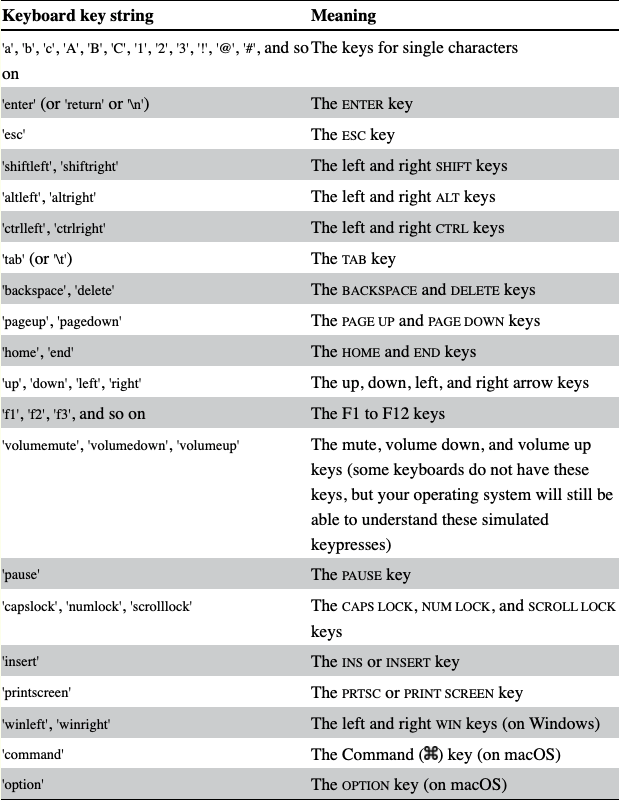

## Hotkey Combinations

In [3]:
pyautogui.hotkey('command', 't') 
time.sleep(0.1)
#pyautogui.hotkey('command', 'w')

In [3]:
def openTab():
    pyautogui.hotkey('command', 't')

def write(to_write):
    word = list(to_write) + ['enter']
    pyautogui.write(word, interval=0.1)
    
def makeGoogleSearch(search_term):
    openTab()
    time.sleep(0.1)
    write(search_term)

In [7]:
makeGoogleSearch('Arcade Fire')

In [3]:
def autoguiEnterStringFormat(word):
    return list(word) + ['enter']

def sendMessage(spam_times, message):
    i = 0
    while i < spam_times: 
        pyautogui.write(autoguiEnterStringFormat(message), interval=0.05)
        time.sleep(0.5)
        i+=1

def getContactChat(contact):
    pyautogui.press('tab')
    time.sleep(0.5)
    pyautogui.write(autoguiEnterStringFormat(contact), interval=0.1)
    
#Point(x=832, y=431)

def moveAndClick(point_of_interest):
    pyautogui.moveTo(point_of_interest)
    pyautogui.click(point_of_interest, interval=0.15)
    
def openWhatsApp():
    pyautogui.hotkey('command', 'space')
    #We wait for WhatsApp to load
    time.sleep(0.1)
    pyautogui.write(autoguiEnterStringFormat('WhatsApp'), interval=0.1)
    time.sleep(5)
    screen_center = (832,431)
    moveAndClick((832, 431))
    

def getData():
    contact = pyip.inputStr('Ingresa el nombre EXACTO de tu contacto: ')
    message = pyip.inputStr('Ingresa el mensaje para spamear: ')
    return [contact, message]


def main():
    #contact, message = getData()
    openWhatsApp()
    time.sleep(1.2)
    getContactChat('Alonso Ortiz')
    time.sleep(1.2)
    sendMessage(5, 'Escribo esto con mi mente')

main()

In [4]:
print("dasd")

dasd
